<a href="https://colab.research.google.com/github/komazawa-deep-learning/komazawa-deep-learning.github.io/blob/master/notebooks/2021_0507_3mnists_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import requests

mnist_urls = {
    #http://yann.lecun.com/exdb/mnist/
    'Xtrain': 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
    'Ytrain': 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
    'Xtest': 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
    'Ytest':'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'
}

fashionmnist_urls = {
    #https://github.com/zalandoresearch/fashion-mnist
    'Xtest': 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz',
    'Ytest': 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz',
    'Xtrain': 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz',
    'Ytrain': 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz'
}

kmnist_urls = {
    #http://codh.rois.ac.jp/kmnist/
    'Xtrain': 'http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-images-idx3-ubyte.gz',
    'Ytrain': 'http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-labels-idx1-ubyte.gz',
    'Xtest': 'http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-images-idx3-ubyte.gz',
    'Ytest': 'http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-labels-idx1-ubyte.gz'
}
 

def download_mnist(dataset):
    #上で定義したデータセットの情報を元にデータをダウンロードする
    for name, url in dataset.items():
        fname = url.split('/')[-1]
        print(url, fname)
        r = requests.get(url, timeout=None) #timeout=None はサーバからの応答が遅い場合永遠に待ち続ける
        with open(fname, 'wb') as f:
            f.write(r.content)


In [2]:
#データを変更して，繰り返し実行する際には，次行行頭の # を削除して，上のセルを再実行する必要があります
!rm *.gz
!ls -l *.gz*

mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
fashionmnist_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat' , \
                       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
kmnist_labels = ['お', 'き', 'す', 'つ', 'な', 'は', 'ま', 'や', 'れ', 'を']
# '0,U+304A,お', '1,U+304D,き', '2,U+3059,す', '3,U+3064,つ', '4,U+306A,な', 
# '5,U+306F,は', '6,U+307E,ま', '7,U+3084,や', '8,U+308C,れ', '9,U+3092,を'

labels = mnist_labels
labels = fashionmnist_labels
labels = kmnist_labels

#以下の 3 つのデータセットのうち 1 つを選んで実習してみましょう
dataset = mnist_urls
dataset = fashionmnist_urls
#dataset = kmnist_urls

labels = mnist_labels
labels = fashionmnist_labels
#labels = kmnist_labels

download_mnist(dataset)

zsh:1: no matches found: *.gz
zsh:1: no matches found: *.gz*
http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz t10k-images-idx3-ubyte.gz
http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz t10k-labels-idx1-ubyte.gz
http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz train-images-idx3-ubyte.gz
http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz train-labels-idx1-ubyte.gz


In [3]:
def load_mnist(path, kind='train'):
    """ダウンロードしたデータを読み込む関数"""
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [4]:
!pip install japanize_matplotlib

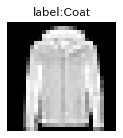

In [5]:
#データの表示
import matplotlib.pyplot as plt
import japanize_matplotlib
X_train, Y_train = load_mnist('.', kind='train')
X_test, Y_test = load_mnist('.', kind='t10k')

#次行の数字を変更して実施してください。ただし数字の範囲は 0 から 59999 までです
No = 5000
plt.figure(figsize=(2,2))    #表示する縦横の大きさ，単位はインチ
plt.title('label:{}'.format(labels[Y_train[No]]))
plt.axis(False)
plt.imshow(X_train[No].reshape(28,28), cmap='gray')
plt.show()

In [6]:
#ここから先は単純な重回帰の実行です
import numpy as np

#簡単のためデータ数を最初の N 個に制限します。
N = 10000
x = X_train[:N]
y = Y_train[:N]

bias = np.ones((x.shape[0],1))          # 線形回帰 y = w x + b の b すなわちバイアス項の定義
X1 = np.concatenate((x, bias), axis=1)  # x と b とを連接して一つの行列にする
XtX = np.dot(X1.T, X1)                  # $X^t X$
XtX_inv = np.linalg.inv(XtX)            # 逆行列 $(X^t X)^{-1}$ の計算
w = np.dot(np.dot(X1, XtX_inv), X1.T)   # 重み係数行列 W の定義
print(f'定義した重み係数行列のサイズ: {w.shape}')

定義した重み係数行列のサイズ: (10000, 10000)


In [7]:
y_ = np.zeros((y.shape[0],10))  #教師データの作成の準備
y_[np.arange(len(y)),y] = 1     #教師データ

y_hat = np.dot(w, y_)           #線形回帰の実施

In [8]:
#回帰分析の結果，精度の印字
teach = np.argmax(y_,axis=1)    #教師信号を teach とする。この処理は冗長です
pred  = np.argmax(y_hat,axis=1) #予測値を pred とする
print(f'訓練データの精度: {((teach == pred) * 1).sum() / N * 100:.3f} %')

訓練データの精度: 85.870 %


In [9]:
#検証データによる評価

y = Y_test
y_ = np.zeros((y.shape[0],10))  #教師データの作成の準備
y_[np.arange(len(y)),y] = 1     #教師データ

y_hat = np.dot(w, y_)
teach = np.argmax(y_, axis=1)
pred = np.argmax(y_hat, axis=1)
print(f'テストデータの精度: {((teach == pred) * 1).sum() / N * 100:.3f} %')

テストデータの精度: 31.320 %


In [10]:
#視覚化のためのライブラリを読み込む
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

Text(0, 0.5, '第二主成分')

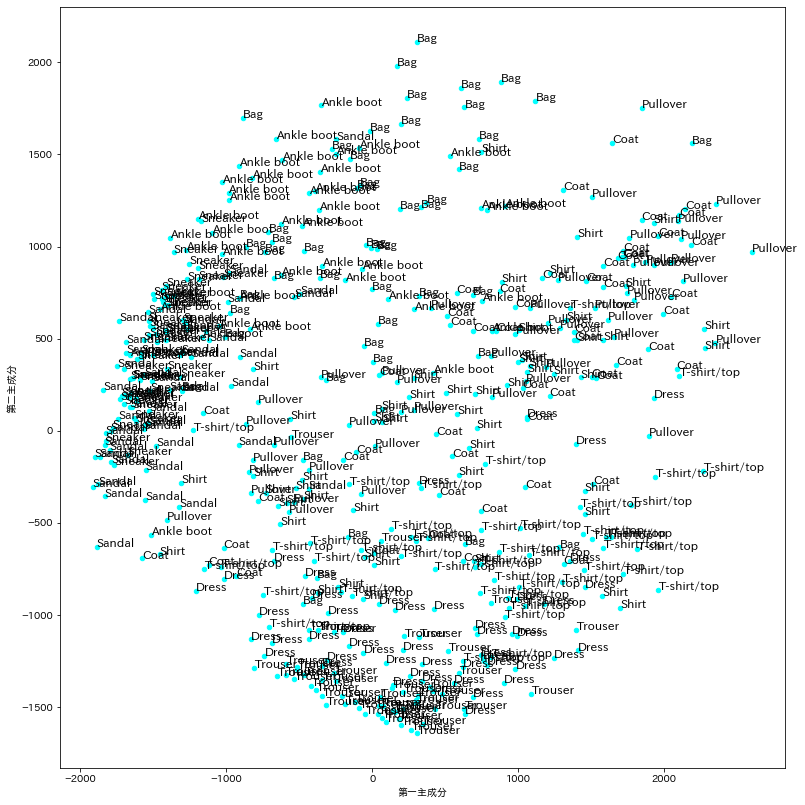

In [11]:
pca = PCA(n_components=2)
N = 500
x = X_train[:N]
y = Y_train[:N]

label = [labels[y[i]] for i in range(len(y))]
pca_results = pca.fit_transform(x)
pca1, pca2 = pca_results[:,0], pca_results[:,1] 
fig, ax = plt.subplots(figsize=(13,14))  
ax.scatter(pca1, pca2, s=20, color='cyan')
for i, l in enumerate(label):
    ax.annotate(l, (pca1[i], pca2[i]), fontsize=12)
ax.set_xlabel('第一主成分')
ax.set_ylabel('第二主成分')


Text(0, 0.5, 'tSNE 2')

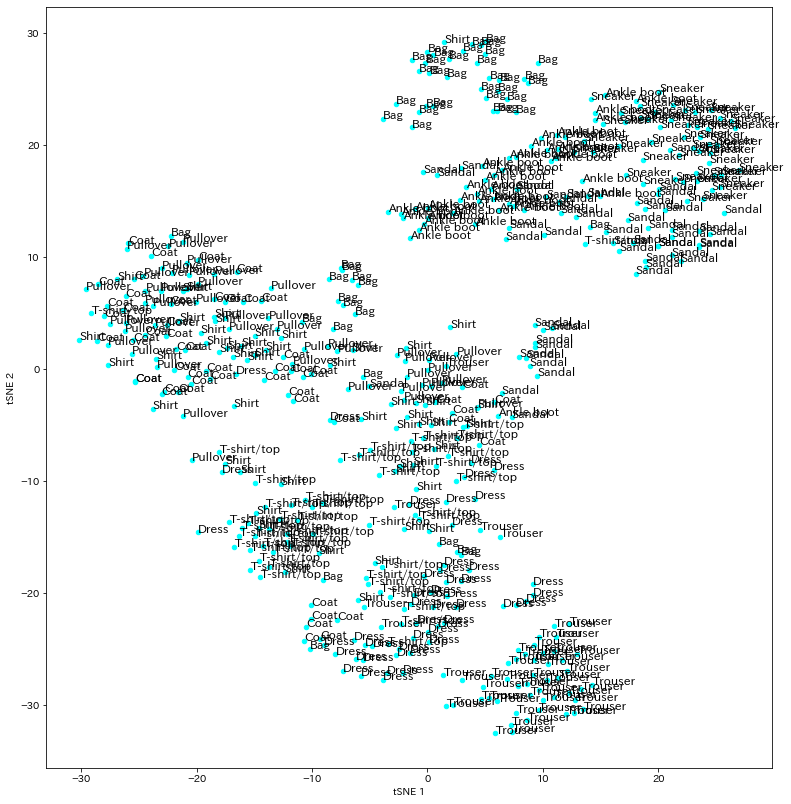

In [12]:
tsne_results = TSNE(n_components=2).fit_transform(x)
tsne1, tsne2 = tsne_results[:,0], tsne_results[:,1]
label = [labels[y[i]] for i in range(len(y))]
fig, ax = plt.subplots(figsize=(13,14))
ax.scatter(tsne1, tsne2, s=20, color='cyan')
for i, l in enumerate(label):
    ax.annotate(l, (tsne1[i], tsne2[i]),fontsize=12)
ax.set_xlabel('tSNE 1')
ax.set_ylabel('tSNE 2')



In [13]:
from sklearn import linear_model

N=10000
X = X_train[:N]
Y = np.copy(Y_train[:N])

In [14]:
logreg = linear_model.LogisticRegression(C=1e5, verbose=10, max_iter=1e+3)
logreg.fit(X, Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.1s finished


LogisticRegression(C=100000.0, max_iter=1000.0, verbose=10)

In [15]:
pred = logreg.predict(X_test)
print(f'テストデータの精度: {((pred == Y_test) * 1).sum() / pred.shape[0] * 100:.3f} %')

テストデータの精度: 77.270 %


In [ ]:
from sklearn.svm import LinearSVC

SVC = LinearSVC()
SVC.fit(X,Y)
pred = SVC.predict(X_test)
print(f'テストデータの精度: {((teach == pred) * 1).sum() / N * 100:.3f} %')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls -lt /content/drive/MyDrive